In this notebook, we will be using shallow neural networks instead of much-preferred CNNs to classify images from already preprocessed Fashion-MNIST dataset to check how well it performs in this case.

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%tensorflow_version 2.x

#### Loading Train and Test Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

#### Feature Engineering

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

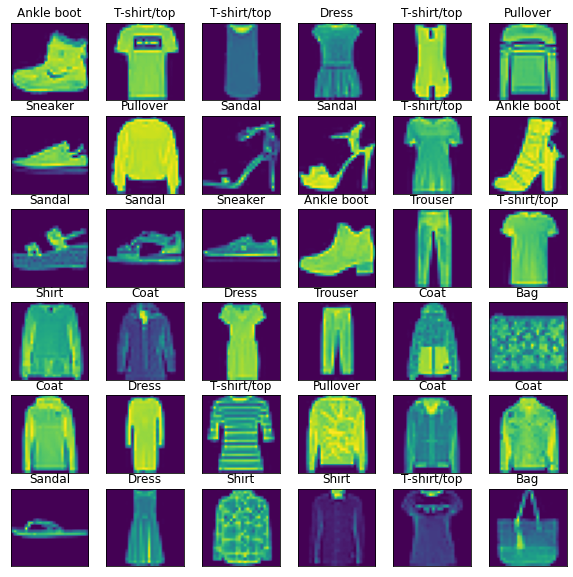

In [6]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

#### Model Building

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Model Training

In [9]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8253
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8772
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8862
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2594 - accuracy: 0.9035
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9075
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

#### Results and Predictions

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8854
Test accuracy: 0.8853999972343445


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Till now our model has been fed with 60,000 images!
And there are 10,000 more pics meant for testing 
So pick a number between 1 to 10,000, and our model will guess its type. 
Let the number be:  
457

Your given input number is pointing at the following image:


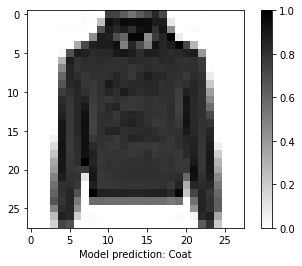

In [12]:
COLOR = 'BLACK' #toggle this from black to white w.r.t to jupyter notebook theme.
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel("Model prediction: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    print("Till now our model has been fed with 60,000 images!")
    print("And there are 10,000 more pics meant for testing ")
    print("So pick a number between 1 to 10,000, and our model will guess its type. ")
    num = input("Let the number be:  \n")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 10000:
        return int(num)
    else:
      print("Try again with different number...\n")

num = get_number()

print("\nYour given input number is pointing at the following image:")
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
